In [6]:
from fastai.vision.all import *

In [7]:
data_path = Path('../data/wicht')
data_path.ls()

(#2) [Path('../data/wicht/raw'),Path('../data/wicht/wicht.csv')]

In [25]:
df = pd.read_csv(data_path/'wicht.csv')
df['path'] = [path.replace('\\', '/') for path in df.path]
df.head()

,Unnamed: 0,path,ocr
0,0,../data/wicht/raw/image1.jpg,0 0 0 7 0 0 0 8 0 0 9 0 0 0 3 1 0 0 0 0 6 8 0 5 0 7 0 0 2 0 6 0 0 0 4 9 0 0 0 2 0 0 0 5 0 0 0 8 0 4 0 0 0 7 0 0 0 9 0 0 0 3 0 3 7 0 0 0 0 0 0 6 1 0 5 0 0 4 0 0 0
1,1,../data/wicht/raw/image10.jpg,0 4 2 0 0 0 0 0 5 0 0 0 6 3 2 0 8 0 0 8 0 0 4 0 2 0 0 0 0 0 0 0 0 0 0 0 7 1 5 0 6 8 3 4 0 9 0 8 3 5 0 7 6 1 0 9 1 0 0 6 0 0 0 0 0 0 0 2 0 1 9 0 0 0 6 1 0 0 0 5 0
2,2,../data/wicht/raw/image100.jpg,5 3 0 0 7 0 0 0 8 0 0 0 0 0 4 9 2 5 0 0 0 0 2 0 1 7 0 0 0 1 2 0 0 8 4 0 0 4 0 0 0 0 2 0 9 0 0 0 4 0 7 0 0 0 9 8 0 0 6 1 7 0 2 0 7 5 0 0 0 3 8 1 1 0 0 0 0 5 0 0 4
3,3,../data/wicht/raw/image1000.jpg,0 0 6 0 7 0 0 0 0 0 4 0 0 0 0 0 0 7 0 7 0 5 0 0 2 1 0 0 0 8 0 5 0 0 0 1 0 2 1 0 0 0 4 3 0 6 0 0 0 3 0 7 0 0 0 6 3 0 0 8 0 4 0 1 0 0 0 0 0 0 9 0 0 0 0 1 0 0 6 0 0
4,4,../data/wicht/raw/image1001.jpg,0 9 0 0 5 4 2 7 6 7 0 0 8 0 6 5 0 0 5 6 0 2 0 9 1 0 8 0 0 0 0 4 0 0 2 9 0 7 0 0 1 0 8 0 5 2 0 0 0 0 0 4 0 0 0 0 8 0 0 7 0 4 2 0 0 0 6 8 0 0 0 3 6 0 7 0 0 0 0 0 0


## Simple model test

In [26]:
df['target'] = [col[0] for col in df['ocr']]
df.head()

,Unnamed: 0,path,ocr,target
0,0,../data/wicht/raw/image1.jpg,0 0 0 7 0 0 0 8 0 0 9 0 0 0 3 1 0 0 0 0 6 8 0 5 0 7 0 0 2 0 6 0 0 0 4 9 0 0 0 2 0 0 0 5 0 0 0 8 0 4 0 0 0 7 0 0 0 9 0 0 0 3 0 3 7 0 0 0 0 0 0 6 1 0 5 0 0 4 0 0 0,0
1,1,../data/wicht/raw/image10.jpg,0 4 2 0 0 0 0 0 5 0 0 0 6 3 2 0 8 0 0 8 0 0 4 0 2 0 0 0 0 0 0 0 0 0 0 0 7 1 5 0 6 8 3 4 0 9 0 8 3 5 0 7 6 1 0 9 1 0 0 6 0 0 0 0 0 0 0 2 0 1 9 0 0 0 6 1 0 0 0 5 0,0
2,2,../data/wicht/raw/image100.jpg,5 3 0 0 7 0 0 0 8 0 0 0 0 0 4 9 2 5 0 0 0 0 2 0 1 7 0 0 0 1 2 0 0 8 4 0 0 4 0 0 0 0 2 0 9 0 0 0 4 0 7 0 0 0 9 8 0 0 6 1 7 0 2 0 7 5 0 0 0 3 8 1 1 0 0 0 0 5 0 0 4,5
3,3,../data/wicht/raw/image1000.jpg,0 0 6 0 7 0 0 0 0 0 4 0 0 0 0 0 0 7 0 7 0 5 0 0 2 1 0 0 0 8 0 5 0 0 0 1 0 2 1 0 0 0 4 3 0 6 0 0 0 3 0 7 0 0 0 6 3 0 0 8 0 4 0 1 0 0 0 0 0 0 9 0 0 0 0 1 0 0 6 0 0,0
4,4,../data/wicht/raw/image1001.jpg,0 9 0 0 5 4 2 7 6 7 0 0 8 0 6 5 0 0 5 6 0 2 0 9 1 0 8 0 0 0 0 4 0 0 2 9 0 7 0 0 1 0 8 0 5 2 0 0 0 0 0 4 0 0 0 0 8 0 0 7 0 4 2 0 0 0 6 8 0 0 0 3 6 0 7 0 0 0 0 0 0,0


In [27]:
df.target.value_counts()

0    89
7    26
5    24
9    16
6    15
8    10
4     8
1     8
2     4
3     3
Name: target, dtype: int64

In [28]:
dblocks = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(.2),
                   get_x=ColReader(1),
                   get_y=ColReader(3),
                   item_tfms=Resize((640, 480)))

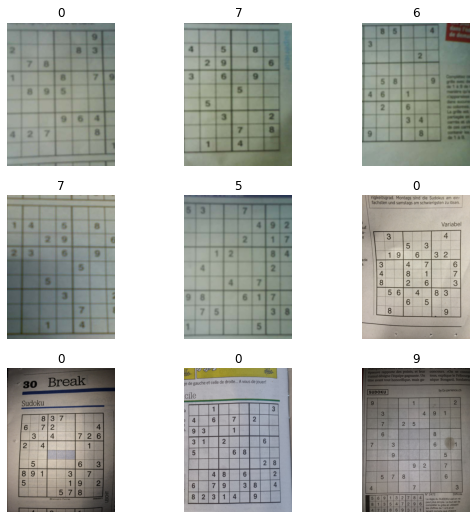

In [29]:
dls = dblocks.dataloaders(df)
dls.show_batch()

In [30]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 1258291200 bytes. Error code 12 (Cannot allocate memory)